In [ ]:
#### Eugenio Perez Molphe Montoya ####
#### 17.06.2024 ####
#### I add the taxonomic information to the genomes that have iroN, then I create figures to visualize the distribution of the gene in Enterobacteriaceae ####

In [2]:
# In case that I want to reset the kernel

%reset -f

Necessary for everything

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import os
from matplotlib.colors import ListedColormap

In [2]:
### Read the taxonomic information files ####

pathEnterobacteriaceae = '/mnt/mnemo6/nnaepf/for_eugenio/tax_info_complete.txt'

# This information will be saved as dictionary with the following structure:
# taxonomic identity number : [taxomic identities in the different taxonomic levels]
with open(pathEnterobacteriaceae) as f:
    enterTaxInfoList = f.readlines()

enterTaxInfo = {}
for i in enterTaxInfoList:
    line = i.split('\t')
    enterTaxInfo[line[0]] = line[1].split(';')
    print(enterTaxInfo[line[0]][6])

##### To do: try to get the taxonomic information from left to right, instead of right to left ####

# enterTaxInfo[x][-2] = species level [7]
# enterTaxInfo[x][-3] = genus level [6]

Cronobacter
Klebsiella/Raoultella group
Rahnella
Kosakonia
Cronobacter
Salmonella
Serratia
Enterobacteriaceae incertae sedis
Klebsiella/Raoultella group
Escherichia
Salmonella
Salmonella
Salmonella
Kosakonia
Yersinia
Salmonella
Cedecea
Lelliottia
Escherichia
Kosakonia
Salmonella
unclassified Enterobacteriaceae
Escherichia
Enterobacter
Salmonella
Salmonella
Kosakonia
Enterobacter
Serratia
Yersinia
Shigella
Shigella
Pluralibacter
Kluyvera
Cronobacter
Enterobacteriaceae incertae sedis
Salmonella
Enterobacter
Escherichia
Escherichia
Kosakonia
Klebsiella/Raoultella group
Klebsiella/Raoultella group
Escherichia
Yersinia
Yersinia
Rahnella
Rahnella
Rahnella
Kosakonia
unclassified Enterobacteriaceae
unclassified Enterobacteriaceae
Citrobacter
Cedecea
Salmonella
Enterobacter
Cedecea
Cedecea
Enterobacter
Rahnella
Rahnella
Leclercia
Citrobacter
Kosakonia
Klebsiella/Raoultella group
unclassified Enterobacteriaceae
Enterobacter
Enterobacter
unclassified Enterobacteriaceae
unclassified Enterobacteria

In [4]:
#### Time to read all the files of the assembly directory to get the taxonomic number of each genome
directory = '/mnt/mnemo6/nnaepf/Projects/02_enterobac/out/enterobacteriaceae_test/assembly'  # Replace with the actual directory path

fastaFilesNames = os.listdir(directory)

genomesList = []
for i in fastaFilesNames:
    if not i.endswith('.fasta'):
        continue
    else:
        taxonomicCode = i.split('.')[0]
        if taxonomicCode in enterTaxInfo:
            genomesList.append(taxonomicCode)

In [5]:
#### Read the file with the names of the genomes that were double checked to effectively have iroN, I'll use it to filter out the genomes that we're still doubtful ####

pathFilteredPromoters =  '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/filtered_promoters.txt'

with open(pathFilteredPromoters, 'r') as f:
    promoters = f.readlines()

for idx in range(len(promoters)):
    promoters[idx] = promoters[idx].strip()

# Now, let's get the NCBI code for the Salmonella genomes
path = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Salmonella_header_NCBIcode.csv'
headerToNCBIcode = {}
with open(path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        header, NCBIcode = line.strip().split(',')
        header = header.split('.')[0]
        headerToNCBIcode[header] = NCBIcode

for idx in range(len(promoters)):
    if promoters[idx] in headerToNCBIcode:
        promoters[idx] = headerToNCBIcode[promoters[idx]]

# And transform it into a set
qcSet = set(promoters)
print(promoters)

['54291', '54291', '54291', 'GCA_014244715.1', '1560357', '546', 'GCA_014244955.1', '546', '546', '67827', 'GCA_014165615.1', '546', 'GCA_014244595.1', '546', '573', 'GCA_014297915.1', '546', 'GCA_013703345.1', 'GCA_014042825.1', '546', '546', 'GCA_013702675.1', 'GCA_013555915.1', '546', '546', '546', '546', 'GCA_014067055.1', '546', '546', '546', '57706', '57706', '573', '546', '546', '546', '546', 'GCA_013870775.1', 'GCA_014154475.1', 'GCA_013703645.1', '546', '546', 'GCA_013679235.1', 'GCA_014165235.1', '546', '546', '546', '546', 'GCA_013907745.1', 'GCA_013702145.1', '546', '546', 'GCA_013482925.1', '546', 'GCA_014062545.1', '546', 'GCA_014153405.1', 'GCA_013703435.1', '546', '546', '546', '546', 'GCA_014052025.1', 'GCA_013587435.1', '573', '546', 'GCA_014472815.1', '573', '158836', '546', 'GCA_013874735.1', 'GCA_014387265.1', 'GCA_014065805.1', '546', '573', 'GCA_013849385.1', '546', '573', '57706', 'GCA_013875075.1', 'GCA_014455335.1', '158836', '1812934', '158836', '158836', '15

Proportion of IroN in different genera

In [6]:
#### Read the iroN taxonomy identity numbers file ####
pathEnterobacteriaceae = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/enterobacteriaceae_all_blast_hits.taxonomy_identity_numbers.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathEnterobacteriaceae) as f:
    iroNtaxInfo = f.readlines()

for i in range(len(iroNtaxInfo)):
    iroNtaxInfo[i] = iroNtaxInfo[i].strip()

print(len(iroNtaxInfo))

# Now let's filter out the ones that we're not sure
iroNtaxInfo = [i for i in iroNtaxInfo if i in qcSet]

# Then I can create a new list with the taxonomic information for each genome that has iroN, I'll count the repeated taxa to get how many genomes with iroN are present in each taxon
# And a dictionary: key(taxon) : value(list with two values: genomes iroN with and total genomes)
# Then I can create a bar plot with the taxonomic information

549


In [ ]:
### Get the proportion of genomes with iroN in general (I'll use only the dataset with Enterobacteriaceae without the extra info)
### There were 1158 genomes of iroN, and iroNtaxInfo that contains all the genomes with iroN has 549 elements, meaning that:
### 549/1158 = 0.4709, 47.41%
print(549/1158 * 100)

In [7]:
### Create a list of taxonomic information for the genomes that have iroN,
# the proportion of genomes with iroN per sp and genus and the number of genomes with iroN ####

# The total number of genomes available per sp and genus

# Genus
genusList = []
for i in genomesList: # genomesList has the taxonomic codes of all the genomes (1158)
    genusList.append(enterTaxInfo[i][6])

countsGenus = {}
for string in genusList:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

# Species
speciesList = []
for i in genomesList:
    if enterTaxInfo[i][7]:
        speciesList.append(enterTaxInfo[i][7].strip())
    else:
        speciesList.append(enterTaxInfo[i][-1].strip())

countsSpecies = {}  
for string in speciesList:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Create the list of taxonomic information for the genomes that have iroN
iroNtaxInfoGenus = []
iroNtaxInfoSpecies = []
for i in iroNtaxInfo:
    iroNtaxInfoGenus.append(enterTaxInfo[i][6])
    if enterTaxInfo[i][7]:
        iroNtaxInfoSpecies.append(enterTaxInfo[i][7].strip())
    else:
        iroNtaxInfoSpecies.append(enterTaxInfo[i][-1].strip())

# Count the number of genomes with iroN per sp and genus
countsGenusIroN = {}
for string in iroNtaxInfoGenus:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

countsSpeciesIroN = {}
for string in iroNtaxInfoSpecies:
    string = string.strip()
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

{'Klebsiella/Raoultella group': 92, 'Rahnella': 17, 'Kosakonia': 22, 'Salmonella': 86, 'Enterobacter': 76, 'Cronobacter': 98, 'unclassified Enterobacteriaceae': 18, 'Cedecea': 3, 'Citrobacter': 79, 'Lelliottia': 7, 'Kluyvera': 2, 'Leclercia': 15, 'Shigella': 1, 'Serratia': 5, 'Escherichia': 9}
{'Klebsiella': 86, 'Rahnella aquatilis': 7, 'Kosakonia sacchari': 3, 'Salmonella bongori': 57, 'Kosakonia radicincitans': 12, 'Enterobacter cloacae complex': 75, 'Cronobacter sakazakii': 81, 'Type-E symbiont of Plautia stali': 1, 'Type-F symbiont of Plautia stali': 1, 'unclassified Cedecea': 1, 'unclassified Salmonella': 1, 'Cedecea neteri': 1, 'Cedecea lapagei': 1, 'unclassified Rahnella': 4, 'Citrobacter freundii complex': 57, 'Kosakonia pseudosacchari': 3, 'Enterobacteriaceae bacterium EKM102V': 1, 'Enterobacteriaceae bacterium': 5, 'Citrobacter europaeus': 1, 'Enterobacteriaceae bacterium UBA2575': 1, 'Enterobacteriaceae bacterium UBA2603': 1, 'Enterobacteriaceae bacterium UBA2706': 1, 'Enter

In [8]:
### The same but for Salmonella ###

# Let's read the list of Salmonella genomes that have iroN
pathSalmonella = '/mnt/mnemo5/eugenio/IroN_project/Files/04_Blast_annotations/salmonella_blasted_sequences.ncbi_codes.txt'

# Read the file and save it as a list of taxonomic identity numbers
with open(pathSalmonella) as f:
    salmonellaTaxInfo = f.readlines()
salmonellaTaxInfo = [i.strip() for i in salmonellaTaxInfo]
salmonellaTaxInfo = [i for i in salmonellaTaxInfo if i in qcSet]
print(salmonellaTaxInfo[0:10])

# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

# Create a list of taxonomic information for the total Salmonella genomes with Salmonella
speciesListIroN = []
for i in salmonellaTaxInfo:
    speciesListIroN.append(salmonellaTaxInfoDict[i][0])

genusListIroN = []
for i in salmonellaTaxInfo:
    genusListIroN.append(salmonellaTaxInfoDict[i][1])

# And let's count the total number of genomes per sp and genus
salmonellaGenusTotal = []
for i in metadata:
    salmonellaGenusTotal.append(i[3])
salmonellaSpTotal = []
for i in metadata:
    salmonellaSpTotal.append(i[2])

# I'll keep using the dictionaries countsGenus and countsSpecies from the last cell
for string in salmonellaGenusTotal:
    if string in countsGenus:
        countsGenus[string] += 1
    else:
        countsGenus[string] = 1

for string in salmonellaSpTotal:
    if string in countsSpecies:
        countsSpecies[string] += 1
    else:
        countsSpecies[string] = 1

# Count the number of genomes per sp and genus with the same dictionaries countsGenusIroN and countsSpeciesIroN
for string in genusListIroN:
    if string in countsGenusIroN:
        countsGenusIroN[string] += 1
    else:
        countsGenusIroN[string] = 1

for string in speciesListIroN:
    if string in countsSpeciesIroN:
        countsSpeciesIroN[string] += 1
    else:
        countsSpeciesIroN[string] = 1

print(countsGenusIroN)
print(countsSpeciesIroN)

['GCA_000698515.2', 'GCA_000783815.2', 'GCA_000807035.1', 'GCA_001027615.1', 'GCA_001038085.1', 'GCA_001079205.1', 'GCA_001079445.1', 'GCA_001082885.1', 'GCA_001096485.1', 'GCA_001096985.1']
{'Klebsiella/Raoultella group': 92, 'Rahnella': 17, 'Kosakonia': 22, 'Salmonella': 2825, 'Enterobacter': 76, 'Cronobacter': 98, 'unclassified Enterobacteriaceae': 18, 'Cedecea': 3, 'Citrobacter': 79, 'Lelliottia': 7, 'Kluyvera': 2, 'Leclercia': 15, 'Shigella': 1, 'Serratia': 5, 'Escherichia': 9}
{'Klebsiella': 86, 'Rahnella aquatilis': 7, 'Kosakonia sacchari': 3, 'Salmonella bongori': 59, 'Kosakonia radicincitans': 12, 'Enterobacter cloacae complex': 75, 'Cronobacter sakazakii': 81, 'Type-E symbiont of Plautia stali': 1, 'Type-F symbiont of Plautia stali': 1, 'unclassified Cedecea': 1, 'unclassified Salmonella': 1, 'Cedecea neteri': 1, 'Cedecea lapagei': 1, 'unclassified Rahnella': 4, 'Citrobacter freundii complex': 57, 'Kosakonia pseudosacchari': 3, 'Enterobacteriaceae bacterium EKM102V': 1, 'Ente

In [9]:
### Final details for the lists ###

# So 'unclassified Enterobacteriaceae' and 'Enterobacteriaceae incertae sedis' are the same thing, I'll join them
if 'Enterobacteriaceae incertae sedis' in countsGenusIroN:
    countsGenusIroN['unclassified Enterobacteriaceae'] += countsGenusIroN['Enterobacteriaceae incertae sedis']
    del countsGenusIroN['Enterobacteriaceae incertae sedis']

if 'Enterobacteriaceae incertae sedis' in countsGenus:
    countsGenus['unclassified Enterobacteriaceae'] += countsGenus['Enterobacteriaceae incertae sedis']
    del countsGenus['Enterobacteriaceae incertae sedis']

# And let's add the genera that don't have iroN
for i in list(countsGenus.keys()):
    if i not in list(countsGenusIroN.keys()):
        countsGenusIroN[i] = 0

# And let's add the species that don't have iroN
for i in list(countsSpecies.keys()):
    if i not in list(countsSpeciesIroN.keys()):
        countsSpeciesIroN[i] = 0

In [10]:
#### Now let's get the proportion of genus/sp with iroN
proportionGenusIroN = {}
for i in countsGenusIroN:
    proportionGenusIroN[i] = countsGenusIroN[i] / countsGenus[i] * 100

proportionSpeciesIroN = {}
for i in countsSpeciesIroN:
    proportionSpeciesIroN[i] = countsSpeciesIroN[i] / countsSpecies[i] * 100

# Let's print the results
print(proportionGenusIroN)
print(proportionSpeciesIroN)

{'Klebsiella/Raoultella group': 92.0, 'Rahnella': 43.58974358974359, 'Kosakonia': 50.0, 'Salmonella': 37.36278270070096, 'Enterobacter': 76.0, 'Cronobacter': 98.0, 'unclassified Enterobacteriaceae': 20.0, 'Cedecea': 27.27272727272727, 'Citrobacter': 79.0, 'Lelliottia': 22.58064516129032, 'Kluyvera': 8.695652173913043, 'Leclercia': 18.9873417721519, 'Shigella': 3.125, 'Serratia': 5.0, 'Escherichia': 9.0, 'Yersinia': 0.0, 'Pluralibacter': 0.0}
{'Klebsiella': 94.5054945054945, 'Rahnella aquatilis': 70.0, 'Kosakonia sacchari': 42.857142857142854, 'Salmonella bongori': 100.0, 'Kosakonia radicincitans': 92.3076923076923, 'Enterobacter cloacae complex': 81.52173913043478, 'Cronobacter sakazakii': 98.78048780487805, 'Type-E symbiont of Plautia stali': 100.0, 'Type-F symbiont of Plautia stali': 100.0, 'unclassified Cedecea': 50.0, 'unclassified Salmonella': 100.0, 'Cedecea neteri': 16.666666666666664, 'Cedecea lapagei': 33.33333333333333, 'unclassified Rahnella': 44.44444444444444, 'Citrobacter

In [11]:
#### Add the update E. coli values
'''
So I have one file with the list of E. coli genomes with a double checked iroN, and a directory with all the E. coli genomes, I'll calculate the proportion of genomes with iroN in the E. coli genomes directly.
The equation used is:
number of E. coli genomes with iroN / total number of E. coli genomes * 100
The paths are:
/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/genomes_w_double_checked_iroN.txt
/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/Genomes/
Rrespectively
'''

proportionGenusIroN['Escherichia'] = 1878 / 10643 * 100
proportionSpeciesIroN['Escherichia coli'] = 1878 / 10643 * 100

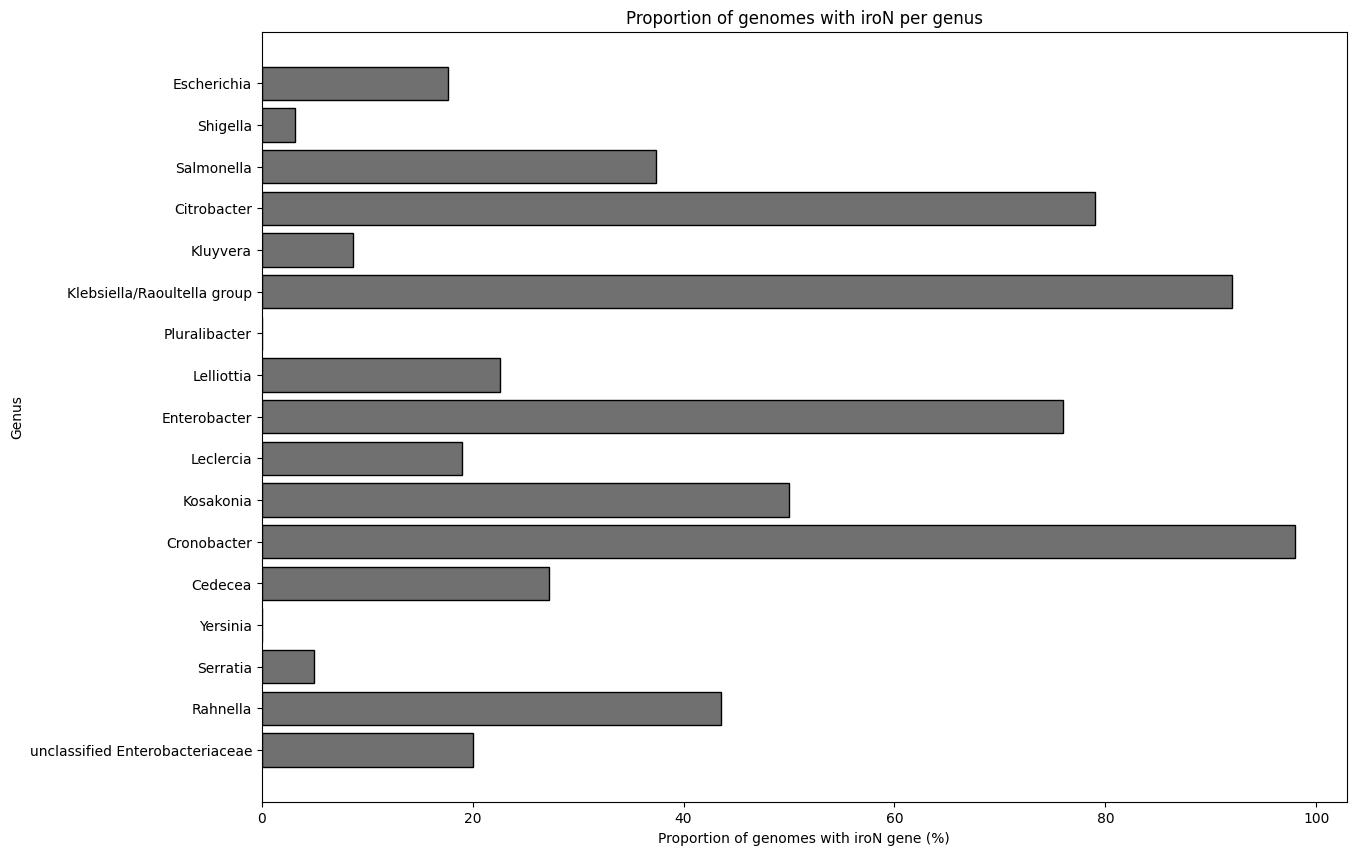

In [14]:
### Let's graph the results ###

# Data for the plot
categories = ['unclassified Enterobacteriaceae', 'Rahnella', 'Serratia', 'Yersinia', 'Cedecea', 'Cronobacter', 'Kosakonia', 'Leclercia', 'Enterobacter', 
              'Lelliottia', 'Pluralibacter', 'Klebsiella/Raoultella group', 'Kluyvera', 'Citrobacter', 'Salmonella', 'Shigella', 'Escherichia']
percentages = [proportionGenusIroN[i] for i in categories]

# Create the horizontal bar plot
plt.figure(figsize=(14, 10))
plt.barh(categories, percentages, color='#707070', edgecolor='black')

# Set the labels and title
plt.xlabel('Proportion of genomes with iroN gene (%)')
plt.ylabel('Genus')
plt.title('Proportion of genomes with iroN per genus')

# Display the plot
plt.show()

In [15]:
### Let's save the results ###

# First let's make sure that the order of the keys of the dictionaries is the same as the one in the categories list
countsGenusIroN = {k: countsGenusIroN[k] for k in categories}
countsGenus = {k: countsGenus[k] for k in categories}
proportionGenusIroN = {k: proportionGenusIroN[k] for k in categories}

orderSp = list(countsSpecies.keys())
countsSpeciesIroN = {k: countsSpeciesIroN[k] for k in orderSp}
countsSpecies = {k: countsSpecies[k] for k in orderSp}
proportionSpeciesIroN = {k: proportionSpeciesIroN[k] for k in orderSp}

# Data for the pandas dataframe
dataGenus = {'Genus': list(countsGenus.keys()), 'Total genomes': list(countsGenus.values()), 'Genomes with iroN': list(countsGenusIroN.values()), 'Proportion (%)': list(proportionGenusIroN.values())}
dataSpecies = {'Species': list(countsSpecies.keys()), 'Total genomes': list(countsSpecies.values()), 'Genomes with iroN': list(countsSpeciesIroN.values()), 'Proportion (%)': list(proportionSpeciesIroN.values())}

# Create the pandas dataframes
dfGenus = pd.DataFrame(dataGenus)
dfSpecies = pd.DataFrame(dataSpecies)

# Save the dataframes as csv files
pathGenus = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Genus_iroN_proportion_w_filtering.csv'
pathSp = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Species_iroN_proportion_w_filtering.csv'

dfGenus.to_csv(pathGenus, index=False)
dfSpecies.to_csv(pathSp, index=False)

I'll do the heatmap of the promoters

In [5]:
# Now let's read the metadata file with the taxonomy of the Salmonella species
# The path of the metadata file
pathMetadata = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_metadata.txt'

# Read the metadata file
with open(pathMetadata, 'r') as f:
    metadata = f.readlines()
metadata.pop(0) # Remove the header (accession,bioproject_accession,species_pg3,genus_pg3,Completeness,Contamination,number_of_contigs)
metadata = [i.strip().split(',') for i in metadata]

# Create a dictionary with the taxonomic information of the Salmonella genomes
salmonellaTaxInfoDict = {}
for i in metadata:
    salmonellaTaxInfoDict[i[0]] = [i[2], i[3]]

In [ ]:
enteroPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/enterobacteriaceae_matrix_all.tsv'
salmoPath = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/salmonella_matrix_all.tsv'

# Let's read the dataframes
dfEntero = pd.read_csv(enteroPath, sep='\t')
dfSalmo = pd.read_csv(salmoPath, sep='\t')

# Let's change the name of the column with the genome names
dfEntero = dfEntero.rename(columns={'Unnamed: 0' : 'Genome'})
dfSalmo = dfSalmo.rename(columns={'Unnamed: 0' : 'Genome'})

dfEntero['Genome'] = dfEntero['Genome'].astype(str)

# Let's replace the genome codes with sp names, I need the dictionary enterTaxInfo
for i in enterTaxInfo:
    dfEntero = dfEntero.replace(i, enterTaxInfo[i][7].strip())

print(dfEntero)

In [ ]:
# Let's do the same for Salmonella
pathNCBIcodes = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Salmonella_header_NCBIcode.csv'

# Create the dictionary with the NCBI codes
with open(pathNCBIcodes, 'r') as f:
    lines = f.readlines()
    headerToNCBIcodeSalmo = {}
    for line in lines:
        line = line.strip().split(',')
        headerToNCBIcodeSalmo[line[0]] = line[1]

# Now let's replace the genome codes with the NCBI taxonomic codes
dfSalmo['Genome'] = dfSalmo['Genome'].astype(str) + ".1"
for i in headerToNCBIcodeSalmo:
    dfSalmo = dfSalmo.replace(i, headerToNCBIcodeSalmo[i])

# And then let's assign the species names to the genomes

for i in salmonellaTaxInfoDict:
    dfSalmo = dfSalmo.replace(i, salmonellaTaxInfoDict[i][0])

print(dfSalmo)

In [8]:
# Let's add the Escherichia promoters
ecoliPath = '/mnt/mnemo5/eugenio/IroN_project/Files/10_Escherichia/promoters_df.csv'

# Read the dataframe
dfEscherichia = pd.read_csv(ecoliPath, sep='\t')
dfEscherichia = dfEscherichia.rename(columns={'Unnamed: 0' : 'Genome'})

# Let's add the species name
dfEscherichia['Genome'] = 'Escherichia coli'

In [9]:
# So I don't care about promoter's scores and I'll just replace the values with 1
dfEntero.replace(2, 1, inplace=True)
dfSalmo.replace(2, 1, inplace=True)
dfEscherichia.replace(2, 1, inplace=True)

In [10]:
### This is to get the percentage of genomes with ArgR/ArgR2 in the Dfs
dfSalmo['ArgR-like'] = (dfSalmo['argR'] == 1) | (dfSalmo['argR2'] == 1)
dfEntero['ArgR-like'] = (dfEntero['argR'] == 1) | (dfEntero['argR2'] == 1)
dfEscherichia['ArgR-like'] = (dfEscherichia['argR'] == 1) | (dfEscherichia['argR2'] == 1)

In [ ]:
##### Create a dataframe of Salmonella enterica genomes with iroN ####

salmonellaInEnteroDF = dfEntero['Genome'] == 'Salmonella enterica'
genomesToAdd = dfEntero[salmonellaInEnteroDF]

dfSalmo = pd.concat([dfSalmo, genomesToAdd], ignore_index=True)

# Then let's remove the genomes that are not Salmonella enterica, i.e. Salmonella bongori
dfSalmo.drop(dfSalmo[dfSalmo['Genome'] == 'Salmonella bongori'].index, inplace=True)

# Let's fill the NaN values with 0
for col in dfSalmo.columns:
    if col != 'Genome':
        dfSalmo[col] = dfSalmo[col].fillna(0).astype(int)

# Remove the columns with only zeroes
dfSalmo = dfSalmo.loc[:, (dfSalmo != 0).any(axis=0)]

print(dfSalmo)

In [ ]:
##### Create a df that contains all Salmonella genomes with iroN ####
genusOfInterest = 'Salmonella'
dfFiltered = dfEntero[dfEntero['Genome'].str.contains(genusOfInterest)]

dfSalmo = pd.concat([dfSalmo, dfFiltered], ignore_index=True)

# Let's fill the NaN values with 0
for col in dfSalmo.columns:
    if col != 'Genome':
        dfSalmo[col] = dfSalmo[col].fillna(0).astype(int)

dfSalmo = dfSalmo.loc[:, (dfSalmo != 0).any(axis=0)]

print(dfSalmo)

In [ ]:
##### Create a dataframe with proportions of genomes with iroN per genera ####

# Let's correct a Salmonella that escaped the renaming
dfSalmo = dfSalmo.replace('CP033348.1', 'Salmonella enterica')
dfEntero = dfEntero.replace('Enterobacteriaceae bacterium 9_2_54FAA', 'unclassified')
dfEntero = dfEntero.replace('unclassified Citrobacter', 'unclassified')

# Remove the genomes of Escherichia coli in dfEntero (I have already those genomes in dfEscherichia)
dfEntero = dfEntero[~dfEntero['Genome'].str.contains('Escherichia coli')]

# First of all, I'll create a df that contains all the genomes, and then get only the genera as rows
dfAll = pd.concat([dfEntero, dfSalmo, dfEscherichia], ignore_index=True)
dfAll['Genome'] = dfAll['Genome'].str.split().str[0]

# Let's remove the NaNs and force everyone to be an integer
for col in dfAll.columns:
    if col != 'Genome':
        dfAll[col] = dfAll[col].fillna(0).astype(int)

dfMergedByGenera = dfAll.groupby('Genome', as_index=False).sum()

# Let's create a dictionary that counts the ocurrences of a genus in the df
generaCounts = dfAll['Genome'].value_counts()
dfMergedByGenera['Total genomes'] = [generaCounts[i] for i in dfMergedByGenera['Genome']]

# Time to get the proportion of genomes with certain promoter
for col in dfMergedByGenera.columns[1:]:
    if col != 'Total genomes':
        dfMergedByGenera[col] = dfMergedByGenera[col] / dfMergedByGenera['Total genomes'] * 100

# Delete the column total genomes
dfMergedByGenera = dfMergedByGenera.drop(columns=['Total genomes', 'argR', 'argR2'])
dfMergedByGenera = dfMergedByGenera.rename(columns={'Genome' : 'Genus', 'ArgR-like' : 'argR'})

dfMergedByGenera = dfMergedByGenera.round(1)

print(dfMergedByGenera)

In [ ]:
#### Time to create the heatmap ####

# Capitalize the first letter of the promoters
dfMergedByGenera.columns = [col[0].upper() + col[1:] if col else col for col in dfMergedByGenera.columns]

# Let's create a pandas dataframe with the data ordered according to taxonomy, etc
df_pivot = dfMergedByGenera.set_index('Genus')

genera = ['Escherichia', 'Shigella', 'Salmonella', 'Citrobacter', 'Klebsiella', 'Enterobacter', 'Kosakonia', 'Cedecea', 'Serratia', 'unclassified']
df_pivot = df_pivot.reindex(genera)
df_pivot.index = df_pivot.index.map(lambda x: 'Klebsiella/Raoultella group' if x == 'Klebsiella' else x)
df_pivot = df_pivot.reindex(sorted(df_pivot.columns), axis=1)

# Create a mask for zeros
mask = df_pivot == 0

# Create a color palette based on the results of a HE agar
cmap = LinearSegmentedColormap.from_list('mycmap', ['#E7DA92', '#870B17'])
cmap = cmap(np.linspace(0, 1, cmap.N))
cmap[0] = (1, 1, 1, 0)  # Set the zero to white
cmap[-1] = (0, 0, 0, 1)  # Set the last one to black
custom_cmap = ListedColormap(cmap)

norm = plt.Normalize(vmin=df_pivot.min().min(), vmax=df_pivot.max().max())

# Create the figure
plt.figure(figsize=(55, 10))
sns.heatmap(df_pivot, mask=mask, cmap=custom_cmap, norm=norm, annot=False, fmt='', cbar=True, linewidths=0.1, linecolor='#8B855F')

# Rotate the x-axis labels
plt.xticks(rotation=0)

# Italize the y-axis labels
y_labels = df_pivot.index.tolist()
for i, label in enumerate(y_labels):
    if label == 'unclassified':
        plt.gca().get_yticklabels()[i].set_fontstyle('normal')
    else:
        plt.gca().get_yticklabels()[i].set_fontstyle('italic')

# Set the fontsize of the labels
fontsize = 24
plt.xticks(fontsize=fontsize - 4)
plt.yticks(fontsize=fontsize)

#### I need to pivot the columns names and find the correct size, order the promoters according to alphabetic order ####

In [15]:
### Let's save our promoters dataframe

pathPromoters = '/mnt/mnemo5/eugenio/IroN_project/Files/07_Final_Report/Genus_promoters_proportion.csv'
df_pivot.to_csv(pathPromoters, index=True)